In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math as math
import scipy.stats as stats
import statsmodels.api as sm

strengthOfSchedule = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/sos/1999.csv', index_col=0)
strengthOfSchedule.index = strengthOfSchedule.index.rename('Team')
print(strengthOfSchedule.head())

weeklyStats = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/weekly/2019/week1.csv')
print(weeklyStats.head())

yearlyStats = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/2019.csv')
print(yearlyStats.head())

                      OppPPRFantasyPointsAllowed  PPRSOSRank  \
Team                                                           
St. Louis Rams                          20443.76        31.0   
Carolina Panthers                       19799.04        30.0   
Jacksonville Jaguars                    19632.10        29.0   
Tampa Bay Buccaneers                    19523.28        28.0   
San Francisco 49ers                     19456.74        27.0   

                      OppStandardFantasyPointsAllowed  StandardSOSRank  \
Team                                                                     
St. Louis Rams                               15412.76             31.0   
Carolina Panthers                            14905.04             30.0   
Jacksonville Jaguars                         14775.10             29.0   
Tampa Bay Buccaneers                         14349.28             26.0   
San Francisco 49ers                          14575.74             28.0   

                      OppHalfPPR

Text(0, 0.5, 'Annual Fantasy Points')

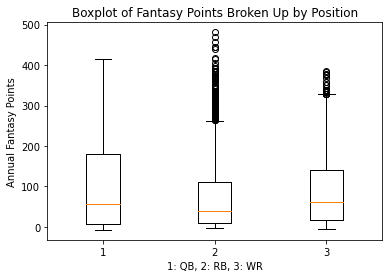

In [2]:
yearlydf = pd.DataFrame()
for x in range(1999,2020):
    tempdf = pd.read_csv('https://raw.githubusercontent.com/fantasydatapros/data/master/yearly/{}.csv'.format(str(x)))
    tempdf['Year'] = x
    yearlydf = pd.concat([yearlydf,tempdf])

yearlydf.drop(['Unnamed: 0','Tgt','Rec','PassingTD','PassingAtt','RushingTD','RushingAtt','ReceivingTD','Int','Fumbles','FumblesLost'],axis=1,inplace=True)

QB_yearlydf = yearlydf.loc[yearlydf['Pos'] == 'QB']
RB_yearlydf = yearlydf.loc[yearlydf['Pos'] == 'RB']
WR_yearlydf = yearlydf.loc[yearlydf['Pos'] == 'WR']
plt.boxplot([QB_yearlydf['FantasyPoints'],RB_yearlydf['FantasyPoints'], WR_yearlydf['FantasyPoints']])
plt.title('Boxplot of Fantasy Points Broken Up by Position')
plt.xlabel('1: QB, 2: RB, 3: WR')
plt.ylabel('Annual Fantasy Points')

Text(0, 0.5, 'Annual Yards')

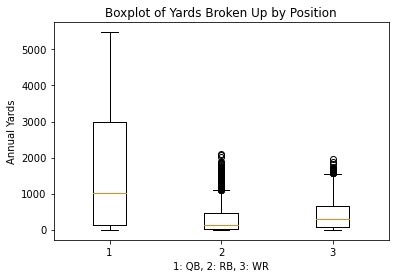

In [3]:
plt.boxplot([QB_yearlydf['PassingYds'],RB_yearlydf['RushingYds'], WR_yearlydf['ReceivingYds']])
plt.title('Boxplot of Yards Broken Up by Position')
plt.xlabel('1: QB, 2: RB, 3: WR')
plt.ylabel('Annual Yards')

Text(0, 0.5, 'Number of Players in Each Bucket')

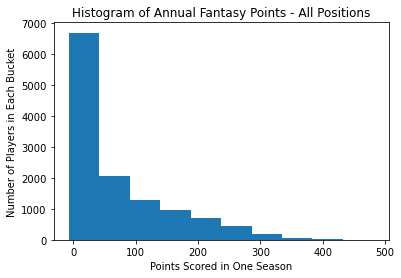

In [4]:
plt.hist(yearlydf['FantasyPoints'])
plt.title('Histogram of Annual Fantasy Points - All Positions')
plt.xlabel('Points Scored in One Season')
plt.ylabel('Number of Players in Each Bucket')

In [5]:
yearlydf.size

137082

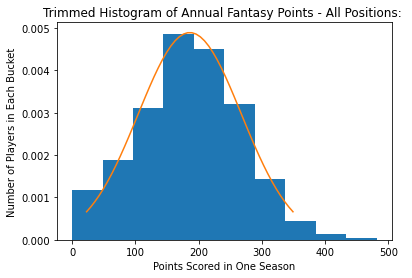

In [6]:
yearlydf_trim = yearlydf.loc[yearlydf['GS'] > 11]
plt.hist(yearlydf_trim['FantasyPoints'],density=True)
plt.title('Trimmed Histogram of Annual Fantasy Points - All Positions: ')
plt.xlabel('Points Scored in One Season')
plt.ylabel('Number of Players in Each Bucket')

points = yearlydf_trim['FantasyPoints']
mean = points.mean()
stdev = math.sqrt(points.var())
normalDist = np.linspace(mean - (2*stdev), mean + 2*stdev)
normCurve = stats.norm.pdf(normalDist,mean,stdev)
ax = plt.plot(normalDist, normCurve)

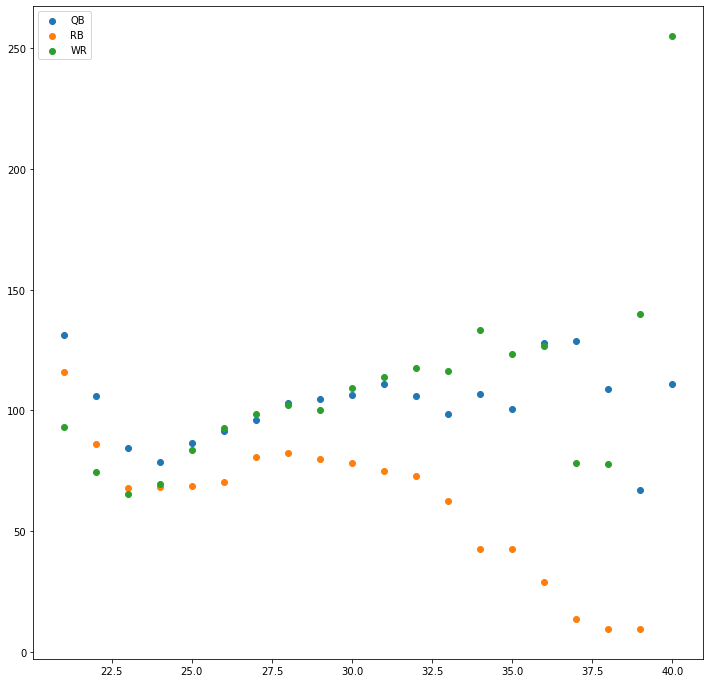

In [46]:
yearlydf.head()
agedf = [pd.DataFrame() for x in range(20)]
QB_means = []
RB_means = []
WR_means = []
for x in range(20):
    QB_means.append(QB_yearlydf.loc[QB_yearlydf['Age'] == x + 21]['FantasyPoints'].mean())
    RB_means.append(RB_yearlydf.loc[RB_yearlydf['Age'] == x + 21]['FantasyPoints'].mean())
    WR_means.append(WR_yearlydf.loc[WR_yearlydf['Age'] == x + 21]['FantasyPoints'].mean())
    
x = np.linspace(21,40,20)

fig, axs = plt.subplots(1,figsize=[12,12])
axs = plt.scatter(x,QB_means,label='QB')
axs = plt.scatter(x,RB_means,label='RB')
axs = plt.scatter(x,WR_means,label = 'WR')
plt.legend()



nan


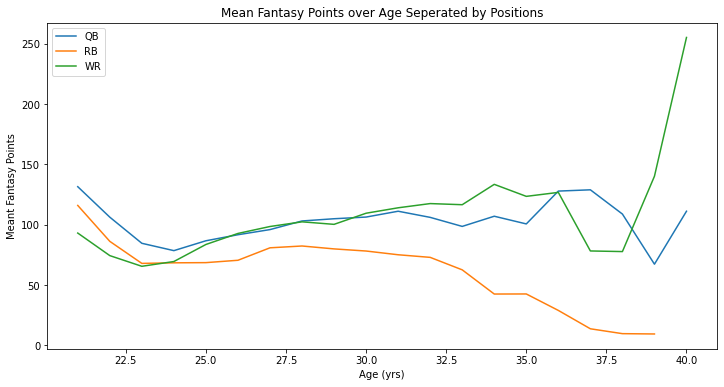

In [70]:
fig1, ax1 = plt.subplots(figsize =(12,6))
ax1.plot(x, QB_means, label='QB')
ax1.plot(x, RB_means, label='RB')
ax1.plot(x, WR_means, label ='WR')
plt.title('Mean Fantasy Points over Age Seperated by Positions')
plt.xlabel('Age (yrs)')
plt.ylabel('Meant Fantasy Points')
plt.legend()

print(np.var(RB_means))